This notebook demonstrates the effect of choices when creating a machine learning pipeline.
It does so by visualising the results of six different pipelines varying the hyperparameters (SVM's $\gamma$) and preprocessing ($\cdots$).

In [1]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn

In [2]:
from helper import make_dataset, plot_svm_surface, plot_estimator_surface

<AxesSubplot:>

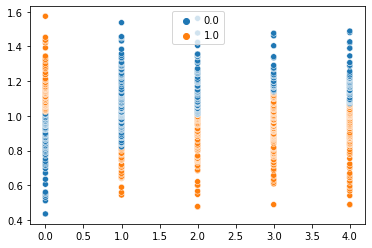

In [10]:
x, y = make_dataset(points=750, splits=[0.5, 0.2, 0.5, 0.8, 0.6])
seaborn.scatterplot(x=x[:, 1], y = x[:, 0], hue=y)

In [4]:
def plot_dataset(X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr, marker='.')
    ax.set_title(title)
    ax.set_xlim(0, 2)
    ax.set_ylim(-.2, 4.2)
    ax.set_xticks([0.0, 1.0, 2.0])
    ax.set_yticks([0, 1, 2, 3, 4])
    return ax
    

In [5]:
from collections import Counter

def target_encoder(x, y, encoding_column):
    """ Simplified target encoder (no fuzziness). """
    x = x.copy()
    categories = Counter(x[:, encoding_column])
    mapping = {
        cat: sum(y[x[:, encoding_column] == cat])/count for cat, count in categories.items()
    }
    x[:, encoding_column] = [mapping[v] for v in x[:, encoding_column]]
    return x

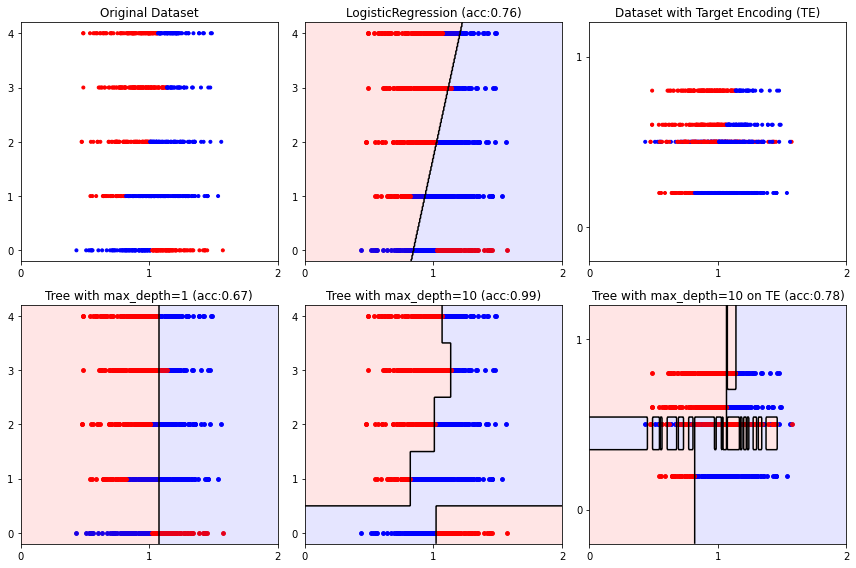

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import LinearSVC
import numpy

nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))
splits = StratifiedKFold(shuffle=True)

plot_dataset(x, y, axes[0, 0], title="Original Dataset")
x_enc = target_encoder(x, y, encoding_column=1)

scores = cross_val_score(LogisticRegression(), x, y, cv=splits)
plot_estimator_surface(LogisticRegression(), x, y, axes[0, 1], title=f"LogisticRegression (acc:{numpy.mean(scores):.2f})")

plot_dataset(x_enc, y, axes[0, 2], title="Dataset with Target Encoding (TE)")
axes[0, 2].set_ylim([-0.2, 1.2])

scores = cross_val_score(DecisionTreeClassifier(max_depth=1), x, y, cv=splits)
plot_estimator_surface(DecisionTreeClassifier(max_depth=1), x, y, axes[1, 0], title=f"Tree with max_depth=1 (acc:{numpy.mean(scores):.2f})")
scores = cross_val_score(DecisionTreeClassifier(max_depth=10), x, y, cv=splits)
plot_estimator_surface(DecisionTreeClassifier(max_depth=10), x, y, axes[1, 1], title=f"Tree with max_depth=10 (acc:{numpy.mean(scores):.2f})")
scores = cross_val_score(DecisionTreeClassifier(max_depth=10), x_enc, y, cv=splits)
plot_estimator_surface(DecisionTreeClassifier(max_depth=10), x_enc, y, axes[1, 2], title=f"Tree with max_depth=10 on TE (acc:{numpy.mean(scores):.2f})")
axes[1, 2].set_ylim([-0.2, 1.2])

plt.tight_layout()